# TP : estimation du pitch dans une phrase

Il s'agit de détecter, au fil de l'eau, la présence d'un pitch (c'est-à-dire la fréquence fondamentale) dans
un signal de parole et, le cas échéant, d'estimer ce dernier. La méthode
de l'auto-corrélation est employée.

Le pitch est noté $f_{0}$ (en Hz), la fréquence d'échantillonnage
$F_{e}=1/T_{e}.$ On supposera que $F_e > 2f_0$.


## Test de la méthode sur un signal de synthèse
### 1) Signal mono-chromatique 
Le signal mesuré est 
$$
x[n]=A \cos(2\pi n u_0 +\varphi)
$$
pour $n=0,...,N-1$ où l'on note $u_0=\frac{f_0}{F_e}$ la fréquence normalisée. Le nombre d'échantillons observés, $N$, est lié à la durée d'observation $D=\frac{N}{F_e}$. 
Nous avons défini  en TD la suite d'auto-corrélation du signal : 
$$
\forall k=0,...,N-1 \ \ \ R_{xx}(k)=\frac{1}{N}\sum_{n=0}^{N-k-1} x[n+k].x[n] 
$$
et avons montré que, si $N$ est "assez grand" alors 
\begin{equation}
\forall  k=0,...,N-1 \ \ :\ R_{xx}(k)\approx A^{2} .R_{th}(k, u_0)
\end{equation}
où nous avons posé pour tout $k\in \mathbb{N}$ et tout $v\in \mathbb{R}$ : 
\begin{equation}
R_{th}(k, v)=\frac{N-k}{2 N}. \cos\left(2\pi k v\right)
\end{equation}


Nous allons valider cette approximation empiriquement. 
Prenons $f_0=220$Hz, $F_e=2000$Hz, $D=0.05$s et $A=1$. 
Je vous offre le code (gratis). Notez que la fonction $\texttt{signal.correlate(x,x)/N}$ retourne le vecteur 
$$
\left( R_{xx}(N-1) \ , \ R_{xx}(N-2) \ ,\ ... \ , \ R_{xx}(0) \ , \ R_{xx}(1) \ ,\ ...R_{xx}(N-1) \right)
$$
et donc il faut commencer par virer les $N-1$ premières valeurs. 
La figure du dessous représente un agrandissement pour les petites valeurs de $k$. Observez la coïncidence parfaite  (pour nos yeux) entre la fonction de corrélation évaluée numériquement et la forme théorique. 

**Note :** il est nécessaire que le taux d'échantillonnage $F_e$ soit assez grand. Dans le cas contraire, on n'observe pas le cosinus de la fonction d'auto-corrélation et en particulier, on peut manquer le deuxième maximun (voir plus loin quant à l'importance de ce point). Une figure vous est proposée qui illustre ce point. La moralité : prendre $F_e$ au moins égale à $10f_0$. 

In [1]:
import importlib
import numpy as np
from scipy import signal   ### pour disposer du calcul des corrélations
from scipy.fftpack import fft, fftshift    ### pour calculer rapidement le périodogramme

###  les fonctions de codage/décodage WAV : 
from scipy.io import wavfile as io
from IPython.display import Audio
import matplotlib.pyplot as plt ### ou encore from matplotlib import pyplot as plt
### permet de faire des zoom, des recadrages grâce à la souris : 
%matplotlib notebook   
from IPython.display import display, Math, Latex


def creer_son_pur(f0,duree,RATE):
    #
    "<f0> frequence en Hz, <duree> en s, <RATE> en Hz"
    t= np.arange(0, duree , 1/RATE) 
    ## On crée le signal : 
    signal = np.cos(2* np.pi* f0*t )
    return signal,t

<IPython.core.display.Javascript object>


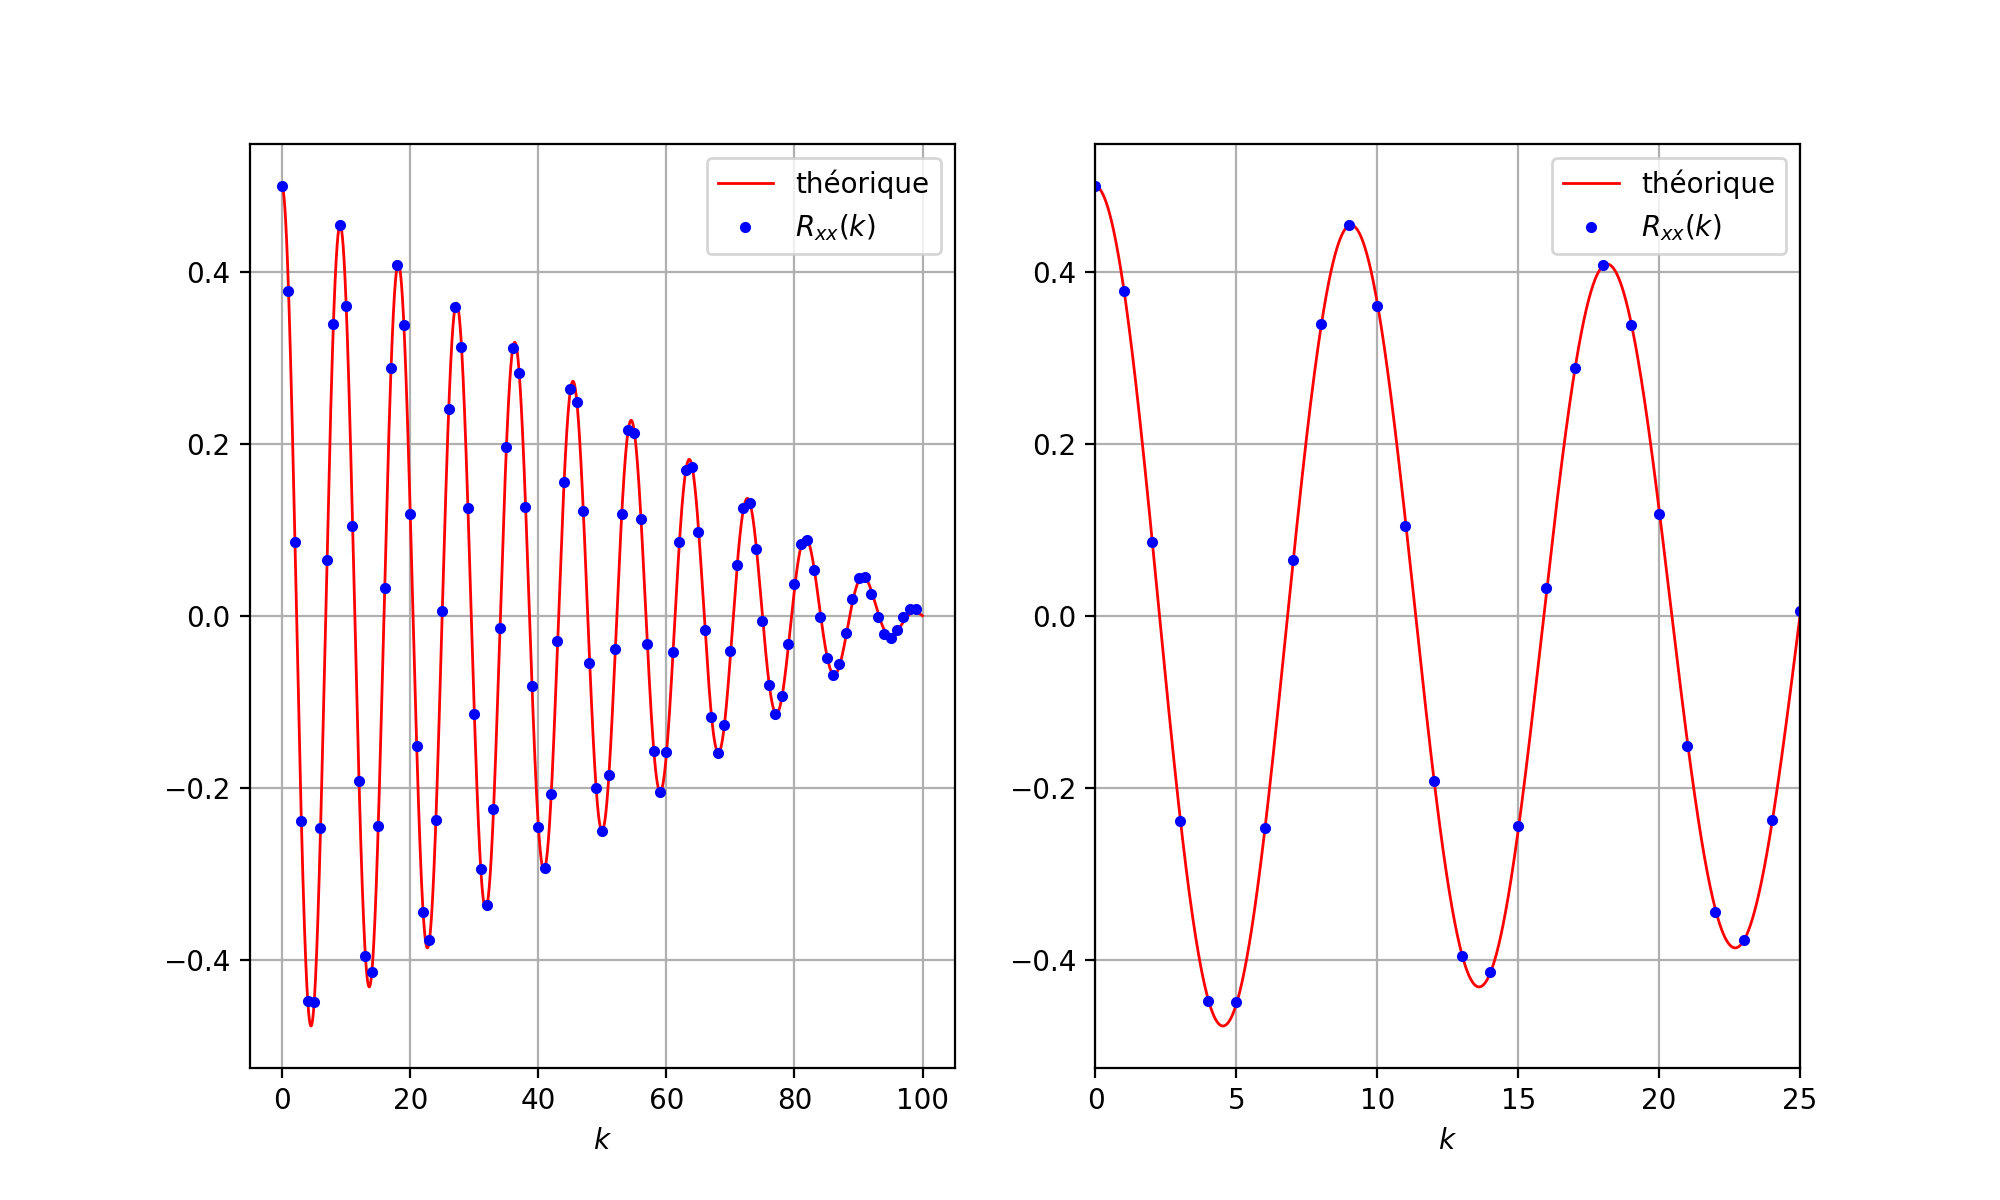

In [2]:
def R_theo(v,A,N):
    s=np.arange(0,N,0.01)
    return (A**2)*0.5*(N-s)/N*np.cos(2*np.pi*s*v),s

def calculerRxx(x):
    N=len(x)
    R_long = signal.correlate(x,x)/N 
    ### Afin de se débarrasser des N-1 premières valeurs (inutiles pour nous) : 
    lags = np.arange(-N+1,N)
    return R_long[lags>=0]


### paramètres de la simulation : 
A=1
duree = 0.05
f0=220
Fe= 2000
u0=f0/Fe

### le signal : 
x, t =creer_son_pur(f0,duree,Fe)
x=A*x
N=len(x)

### calcul de la fonction d'auto-corrélation : 
R=calculerRxx(x)

### calcul de la fonction d'auto-corrélation théorique (asymptotique)
R_asympt, s = R_theo(u0,A,N)


plt.figure(1,figsize = (10, 6))
plt.subplot(121)
plt.plot(s,R_asympt,color="red", linewidth=1,label="théorique")
plt.plot(R,color="blue", linewidth=0.5, linestyle='none', marker='.',label=r"$R_{xx}(k)$")
plt.xlabel(r"$k$")
plt.legend(loc=1)
plt.grid()


plt.subplot(122)
plt.plot(s,R_asympt,color="red", linewidth=1,label="théorique")
plt.plot(R,color="blue", linewidth=0.5, linestyle='none', marker='.',label=r"$R_{xx}(k)$")
plt.xlabel(r"$k$")
plt.xlim(0,25)
plt.legend(loc=1)
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


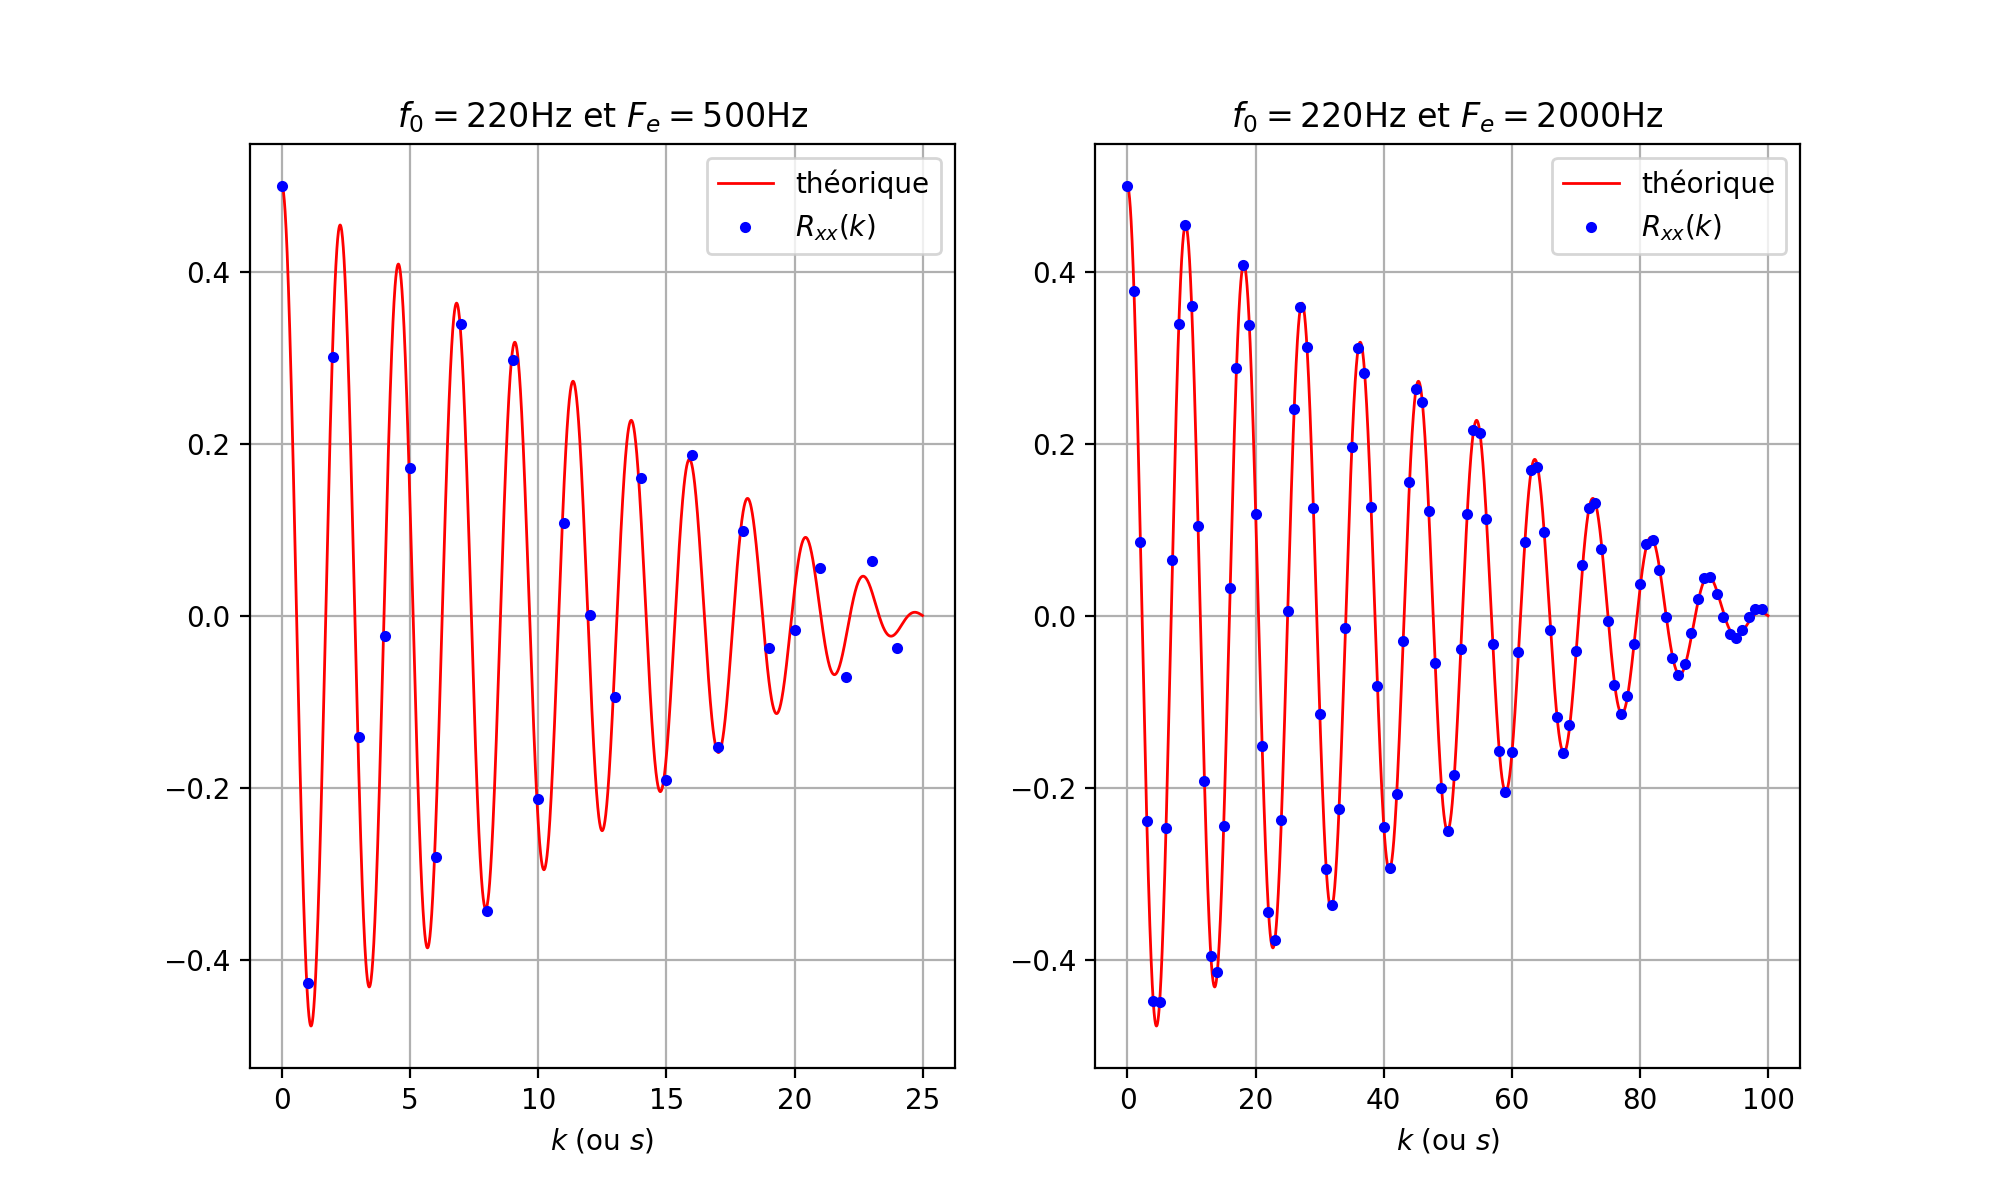

In [3]:
#### De l'importance d'échantillonner assez vite 

A=1
duree = 0.05
f0=220
Fe= 500
u0=f0/Fe

x, t =creer_son_pur(f0,duree,Fe)
x=A*x
N=len(x)

R=calculerRxx(x)


R_asymp, s = R_theo(u0,A,N)


plt.figure(30,figsize = (10, 6))
plt.clf()
plt.subplot(121)
plt.plot(s,R_asymp,color="red", linewidth=1,label="théorique")
plt.plot(R,color="blue", linewidth=0.5, linestyle='none', marker='.',label=r"$R_{xx}(k)$")
plt.xlabel(r"$k$ (ou $s$)")
plt.legend(loc=1)
plt.grid()
titre="$f_0=$"+str(f0)+"Hz"+ " et "+"$F_e=$"+str(Fe)+"Hz"
plt.title(titre)


Fe= 2000
u0=f0/Fe
x, t =creer_son_pur(f0,duree,Fe)
x=A*x
N=len(x)

R_asymp, s = R_theo(u0,A,N)
R=calculerRxx(x)
plt.subplot(122)
plt.plot(s,R_asymp,color="red", linewidth=1,label="théorique")
plt.plot(R,color="blue", linewidth=0.5, linestyle='none', marker='.',label=r"$R_{xx}(k)$")
plt.xlabel(r"$k$ (ou $s$)")
plt.legend(loc=1)
plt.grid()
titre="$f_0=$"+str(f0)+"Hz"+ " et "+"$F_e=$"+str(Fe)+"Hz"
plt.title(titre)

plt.show()


### 2) Algorithme

Maintenant que nous avons validé le calcul fait en TD, observons bien la courbe (l'agrandissement par exemple). 
Il est clair que le "second maximum" se situe à l'indice $k_0$ le plus proche de $1/u_0$. En effet, ce dernier correspond au plus petit $k_0 > 0$ tel que le terme 
$\cos\left(2\pi k_0 u_{0}\right)\approx 1$ c'est-à-dire lorsque $2\pi k_0 u_0\approx 2\pi $ ce qui donne la solution proposée. 
Mais alors $k_0 u_0 \approx 1 $ et donc $u_0\approx \frac{1}{k_0}$ et donc 
\begin{equation}
f_0\approx \frac{F_e}{k_0}.
\end{equation}
Nous avons trouvé un estimateur du pitch $f_0$. 

**Question 1 :** inventer et décrire un algorithme (il n'y a pas qu'une solution) permettant d'estimer l'entier $k_0$ précédent. Tester cet algorithme en reprenant le contexte de la simulation précédente. On appellera $\texttt{EstimPitch(x)}$ cette fonction.

**Remarque no 1 :** j'ai codé la fonction que nous avons trouvée lors de la séance. Inspectons les trois cas présentés jsute en dessous. Remarquons en particulier que le cas no 3 "ne marche pas" : expliquer cette défaillance en s'aidant de la figure située juste au-dessus. 

**Remarque no 2 :** j'ai écrit une seconde fonction de même nature que  $\texttt{EstimPitch(x)}$ mais qui prend en compte un paramètre $K_{\max}$ indiquant que la recherche du second maximum s'effectue entre les indices $k=0$ et $K_{\max}-1$. Ce paramètre $K_{\max}$ est important car il permet d'utiliser lorsque c'est possible une information a priori : $\frac{F_e}{K_{\max}}$ est le pitch le plus bas du locuteur. Or on sait que 
le pitch d’un homme est compris entre 70 et 160 Hertz alors que   celle d’une femme entre 130 et 300 Hertz.


In [4]:
def EstimPitch(x):  ## retourne l'indice k0
    R=calculerRxx(x)
    i=0
    while (R[i]>0):
        R[i]=0
        i+=1
    return np.argmax(R)

def EstimPitch2(x,Kmax):  ## retourne l'indice k0
    R=calculerRxx(x)
    i=0
    while (R[i]>0):
        R[i]=0
        i+=1
    return np.argmax(R[0:Kmax])


## Test : 
A=1
duree = 0.05
f0=220
Fe= 2000
x, t =creer_son_pur(f0,duree,Fe)
x=A*x
print("Expérience no 1 : ")
print("valeur estimée du pitch : ", Fe/EstimPitch(x))
print("valeur réelle du pitch : ", f0)


### Autre expérience : 
print("Expérience no 2 : ")
A=1
duree = 0.1
f0=332
Fe= 4000
x, t =creer_son_pur(f0,duree,Fe)
x=A*x
print("valeur estimée du pitch : ", Fe/EstimPitch(x))
print("valeur réelle du pitch : ", f0)

### Autre expérience : 
print("Expérience no 3 : ")
A=1
duree = 0.5
f0=220
Fe= 500
x, t =creer_son_pur(f0,duree,Fe)
x=A*x
print("valeur estimée du pitch : ", Fe/EstimPitch(x))
print("valeur réelle du pitch : ", f0)



Expérience no 1 : 
valeur estimée du pitch :  222.22222222222223
valeur réelle du pitch :  220
Expérience no 2 : 
valeur estimée du pitch :  333.3333333333333
valeur réelle du pitch :  332
Expérience no 3 : 
valeur estimée du pitch :  55.55555555555556
valeur réelle du pitch :  220


### 3) Résister aux harmoniques
En pratique, le signal dont le pitch est à estimer provient d'une vibration des cordes vocales et donc est périodique à court terme. C'est-à-dire qu'il est pertinent de considérer le modèle du  signal suivant :  
\begin{equation}
x[n]=\sum_{p=1}^{P}A_p \cos(2\pi n (p u_0) +\varphi_p).
\end{equation}

Appelons toujours $R_{xx}(k)$ la suite d'auto-corrélation du signal. 
On peut montrer que si le temps d'observation est assez grand
\begin{equation}
R_{xx}(k) \approx \sum_{p=1}^P A_p^2 R_{th}(k, p. u_0)
\end{equation}
où $R_{th}(k, v)$ est la fonction d'auto-corrélation théorique d'un signal pur de fréquence $v$ défini plus haut.  

**Question 2 ($\flat \flat$) :** montrer cette approximation (il sera utile de s'inspirer du calcul de l'auto-corrélation effectué en TD. En outre, on pourra se concentrer sur le cas particulier de deux composantes $P=2$, le cas général n'offrant pas de difficulté supplémentaire). 

**Question 3 :** Montrer que la fonction périodique 
\begin{equation}
s \mapsto \sum_{p=1}^P  A_p^2 \cos(2\pi p u_0 s)
\end{equation}
admet $\sum_{p=1}^P  A_p^2$ comme valeur maximale et que celle-ci est atteinte aux multiples de $1/u_0$. 
En déduire que l'algorithme d'estimation évoqué dans la première partie "continue de marcher" en présence d'harmoniques. 

J'ai représenté  le graphe de la fonction  d'auto-corrélation  (les paramètres de l'expérience sont précisés dans la cellule ci-dessous); et y ai  superposé le graphe de la fonction d'auto-corrélation théorique. 
Remarquer que le second maximum se situe à l'indice prévu. 



Réponse 2 : $R_{xx}(k)=\frac{1}{N}\sum_{n=0}^{N-k-1} x[n+k].x[n]$


Réponse 3 : $\sum_{p=1}^P  A_p^2 \cos(2\pi p u_0 s)$ $\leq$ $\sum_{p=1}^P  A_p^2  $ car $  \cos(2\pi p u_0 s)$ $\in$ [-1;1] et $A_p^2$ > 0 
Notre algorithme continue de fonctionner puisqu'il ne supprime que le premier maximum et non tous les points ayant la valeur du premier. Le fait que le signal soit harmonique ne change donc absolument rien.

<IPython.core.display.Javascript object>


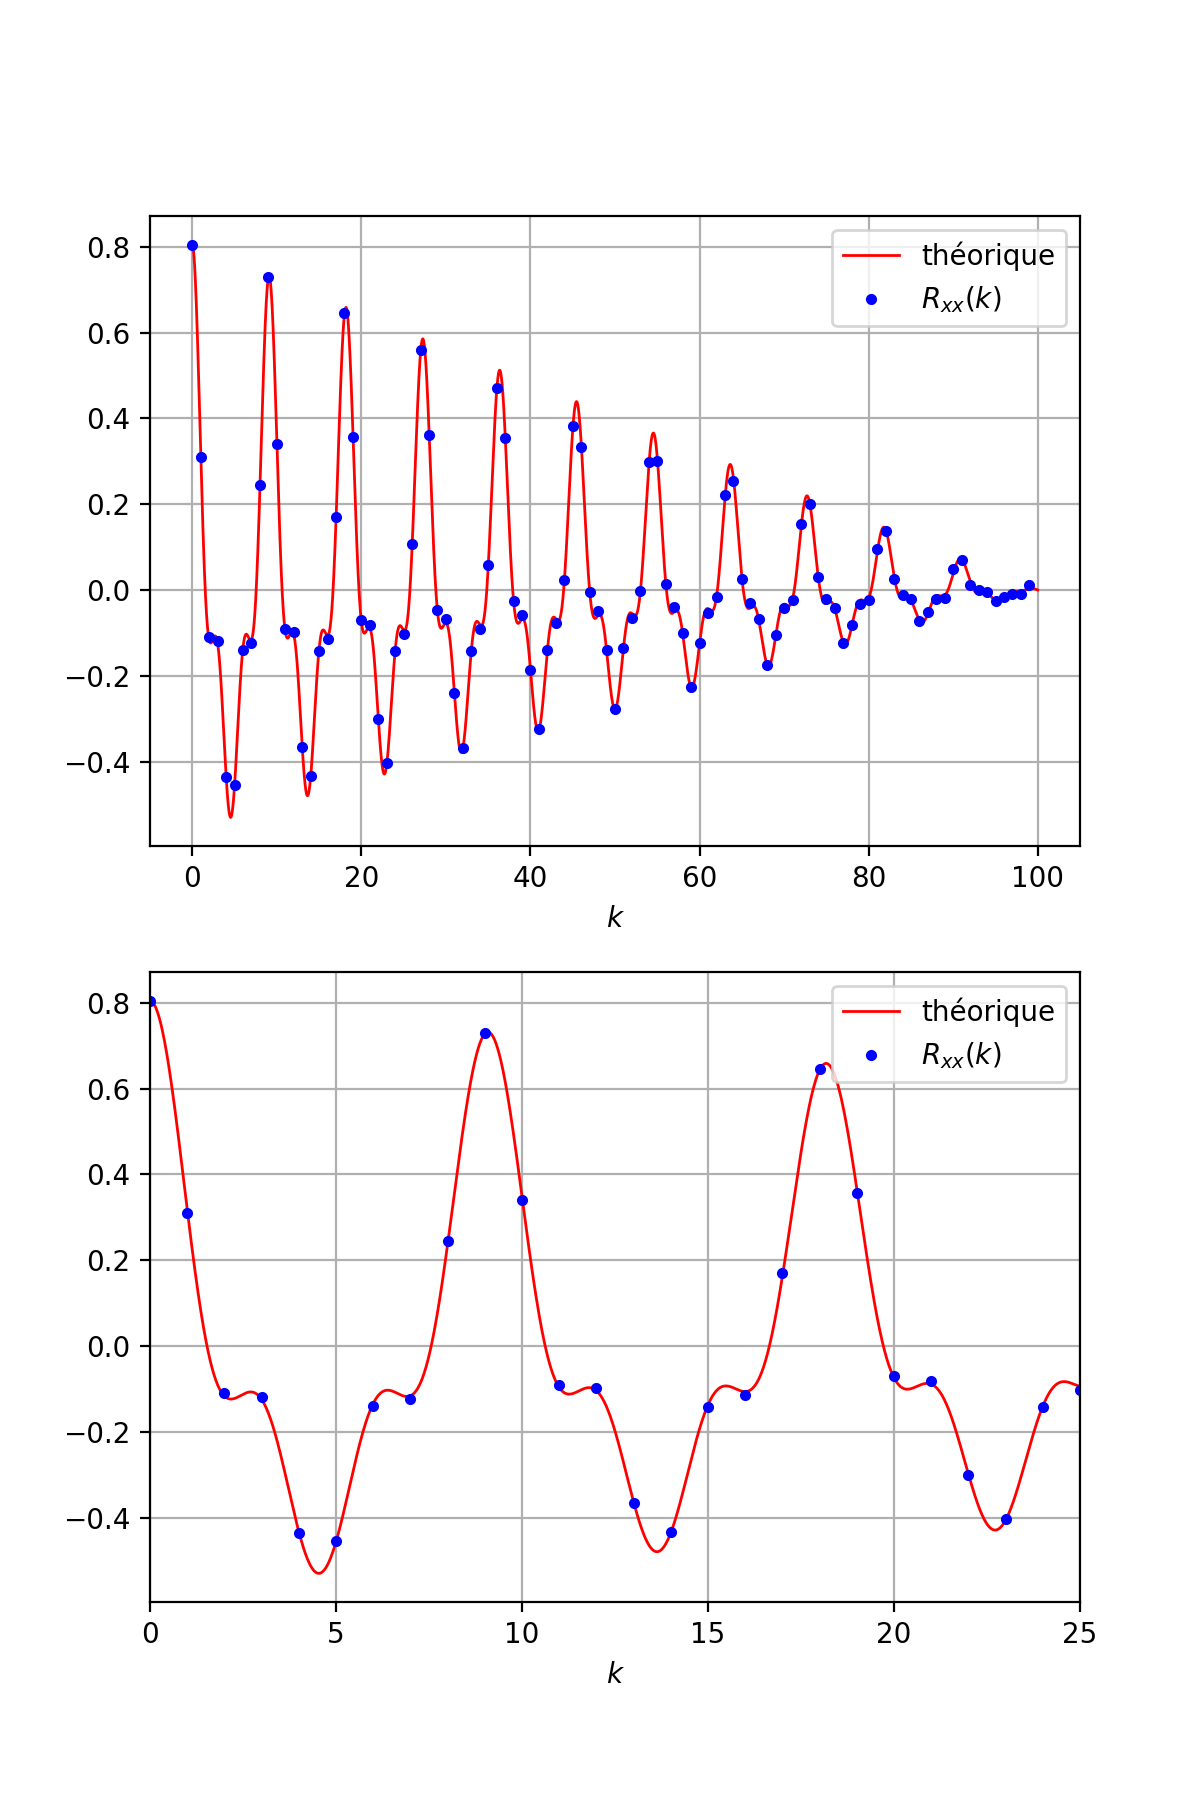

In [5]:
duree = 0.05
f0=220
Fe= 2000

u0=f0/Fe
A1=1
A2=0.5
A3=0.6


x1, t =creer_son_pur(f0,duree,Fe)
x2, t =creer_son_pur(2*f0,duree,Fe)
x3, t =creer_son_pur(3*f0,duree,Fe)

x=A1*x1 + A2*x2 + A3*x3
N=len(x)


#### la fonction d'auto-corrélation calculée à partir du signal : 
R=calculerRxx(x)


#### la fonction d'auto-corrélation théorique : 
R_asymp1, s = R_theo(u0,A1,N)
R_asymp2, s = R_theo(2*u0,A2,N)
R_asymp3, s = R_theo(3*u0,A3,N)
R_asympt = R_asymp1+R_asymp2+R_asymp3


plt.figure(2,figsize = (6, 9))
plt.subplot(211)
plt.plot(s,R_asympt,color="red", linewidth=1,label="théorique")
plt.plot(R,color="blue", linewidth=0.5, linestyle='none', marker='.',label=r"$R_{xx}(k)$")
plt.xlabel(r"$k$")
plt.legend(loc=1)
plt.grid()


plt.subplot(212)
plt.plot(s,R_asympt,color="red", linewidth=1,label="théorique")
plt.plot(R,color="blue", linewidth=0.5, linestyle='none', marker='.',label=r"$R_{xx}(k)$")
plt.xlabel(r"$k$")
plt.xlim(0,25)
plt.legend(loc=1)
plt.grid()
plt.show()

### 4) Résister au bruit : bruit blanc

Générons $b[n]$, un bruit blanc Gaussien centré de variance $1/2$, observé pendant $N=200$ échantillons. 

**Question 4 :** Rappeler pourquoi (c'est un résultat général) la puissance du signal est donnée par $R_{bb}(0)$. (Aide : reprendre la définition de la fonction d'auto-corrélation)

J'ai représenté ci-dessous le graphe de la fonction d'auto-corrélation de deux tirages de bruit. Observez bien que cette fonction est aléatoire. Cependant, il semble que 
$$
\forall k>0  \ \ : \ \ R_{bb}(k)\approx 0.
$$
Nous allons affiner cette remarque. 

Réponse 4 :
$$ R_{xx}(k)=\frac{1}{N}\sum_{n=0}^{N-k-1} x[n+k].x[n] $$
$$ R_{bb}(0)=\frac{1}{N}\sum_{n=0}^{N-1} b[n].b[n] $$
$$ R_{bb}(0)=P(b)$$


<IPython.core.display.Javascript object>


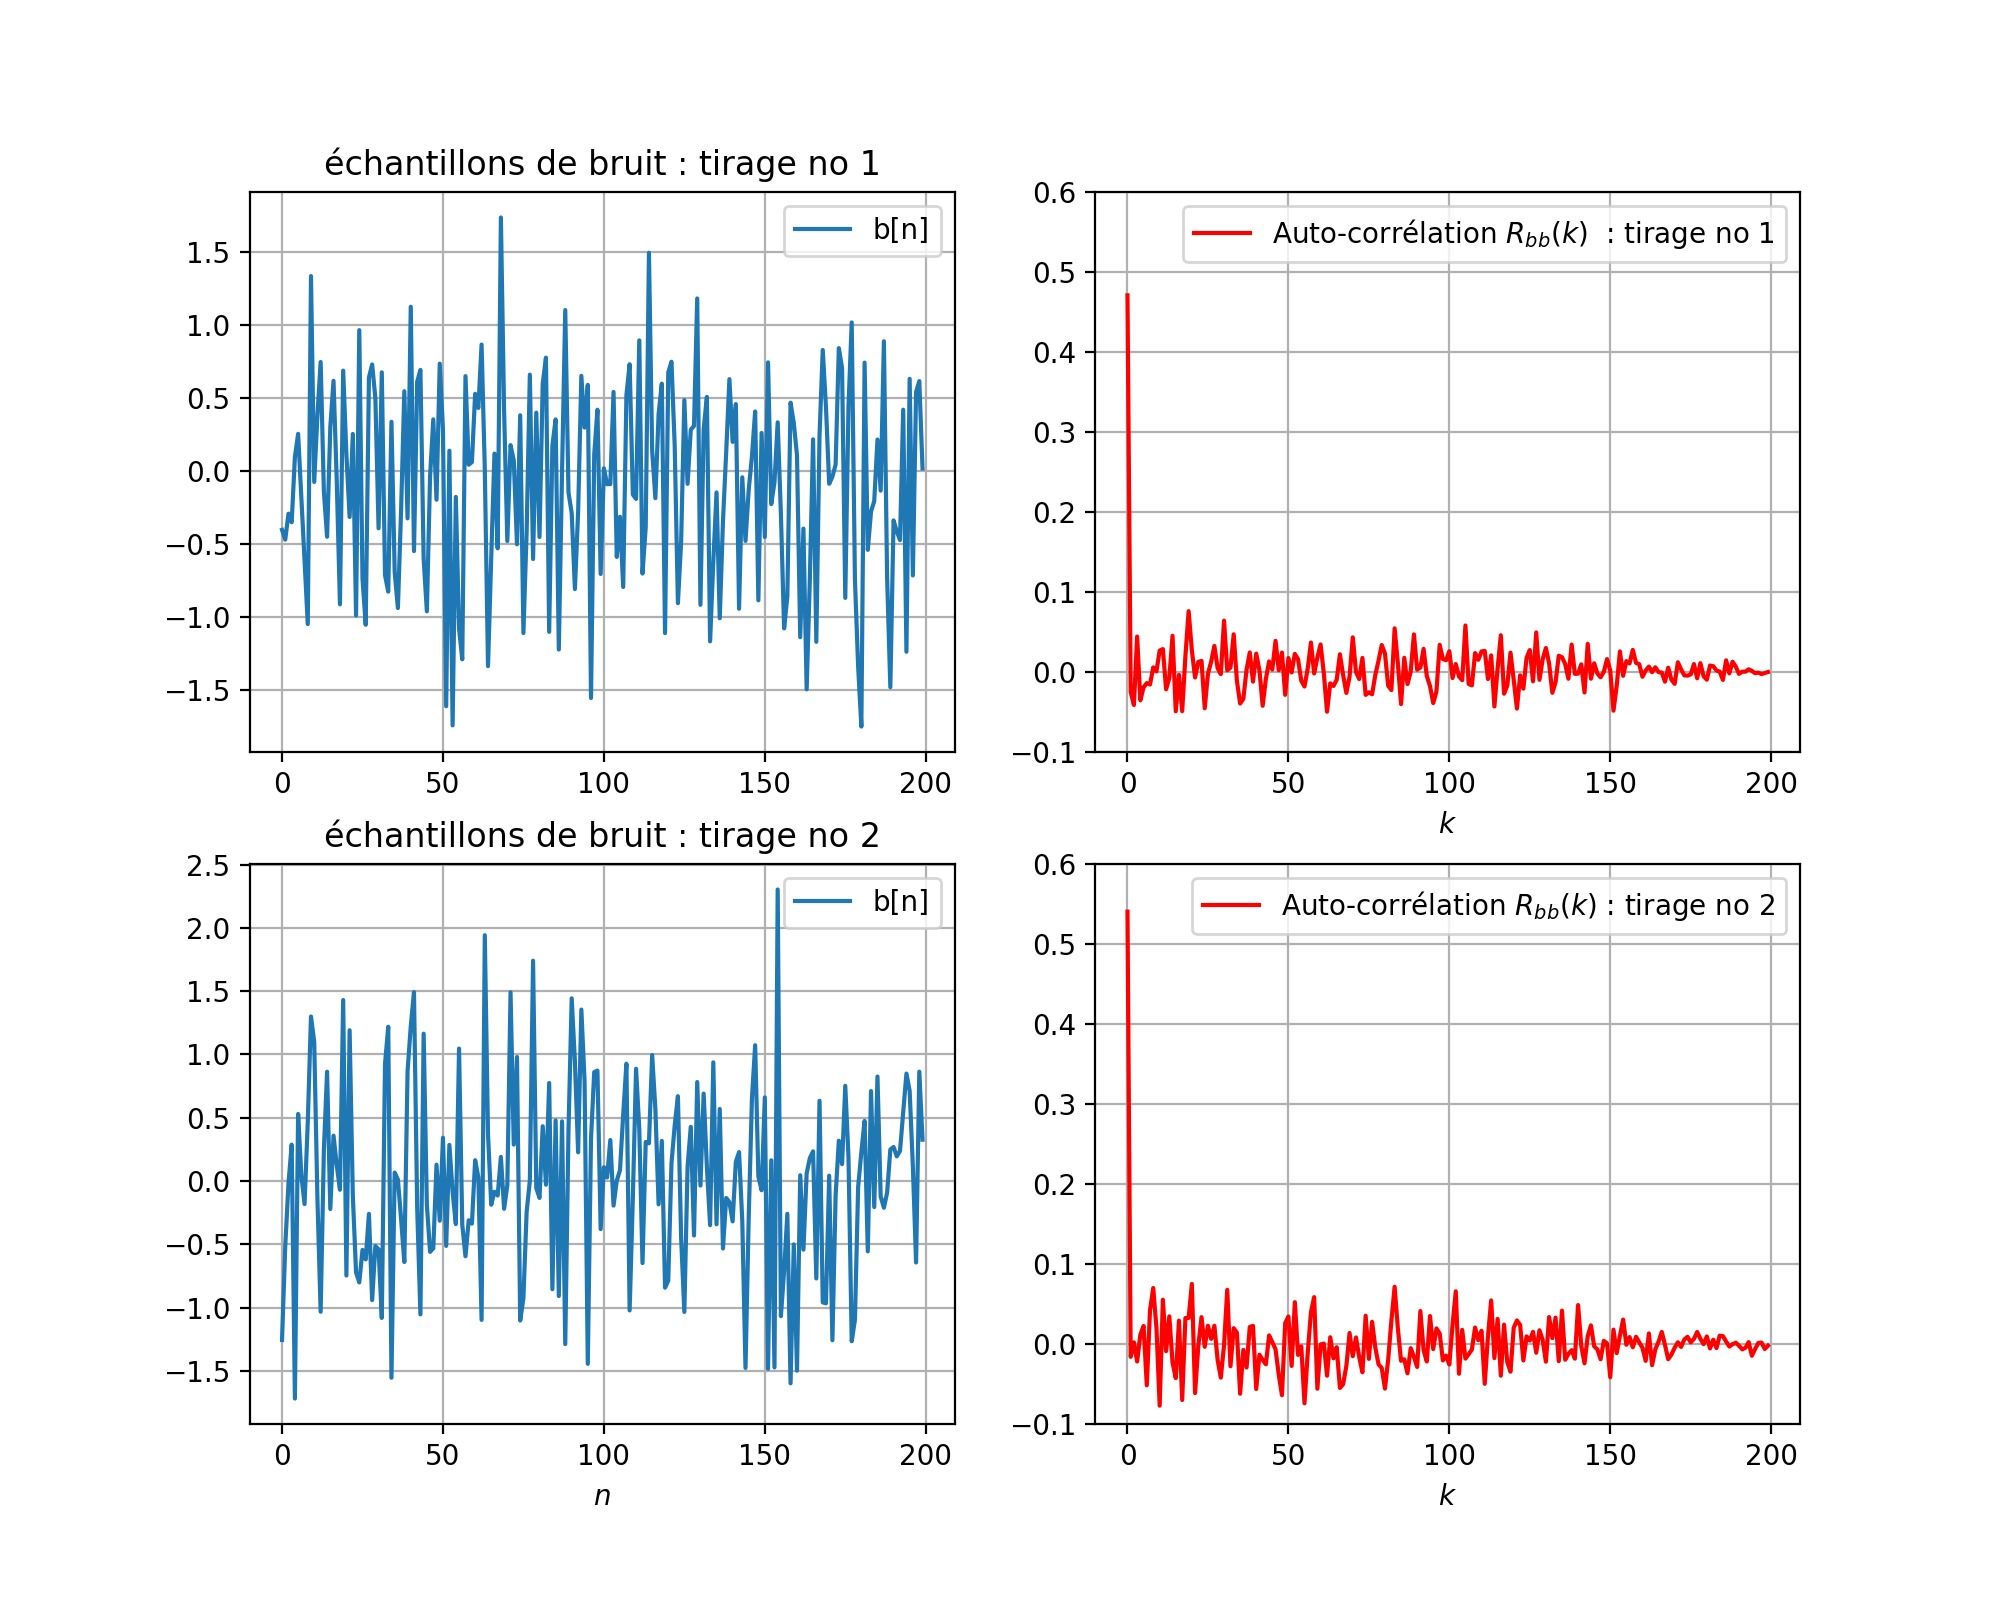

In [6]:
from numpy import random   ### pour disposer du générateur aléatoire

N=200


b1 = 1/np.sqrt(2)*random.randn(N)  ## c'est un tirage Gaussien centré de variance 1/2
Rb1=calculerRxx(b1)
b2 = 1/np.sqrt(2)*random.randn(N)  ## c'est un autre tirage Gaussien centré de variance 1/2
Rb2=calculerRxx(b2)


plt.figure(3,figsize = (10, 8))
plt.clf()

plt.subplot(221)
plt.plot(b1,label=r"b[n]")
plt.grid()
plt.title("échantillons de bruit : tirage no 1")
plt.legend(loc=1)

plt.subplot(223)
plt.plot(b2,label=r"b[n]")
plt.legend(loc=1)

plt.title("échantillons de bruit : tirage no 2")
plt.grid()
plt.xlabel("$n$")


plt.subplot(222)

plt.plot(Rb1,color="red",label="Auto-corrélation $R_{bb}(k)$  : tirage no 1")
plt.xlabel(r"$k$")
plt.ylim(-0.1,0.6)

plt.legend(loc=1)
plt.grid()
plt.subplot(224)

plt.plot(Rb2,color="red",label="Auto-corrélation $R_{bb}(k)$ : tirage no 2")
plt.xlabel(r"$k$")
plt.ylim(-0.1,0.6)
plt.legend(loc=1)

plt.grid()




Evidemment, le bruit étant aléatoire, la fonction d'auto-corrélation l'est aussi. Le code qui suit permet d'obtenir les **boîte à moustaches** de cette fonction en générant un grand nombre de tirages. 

**Question 5 :** Expliquer le sens d'une boîte. Bien prendre en compte les paramètres de la fonction $\texttt{boxplot}$ que j'ai utilisés. 


Reponse 5 : Une boîte à moustache représente la dispersion des valeurs ; 
Le trait du haut fournit la valeur maximale, celui du bas la minimale, et le trait dans la boite est la valeur médiane.
Les contours de la boite représentent les quartiles.



<IPython.core.display.Javascript object>


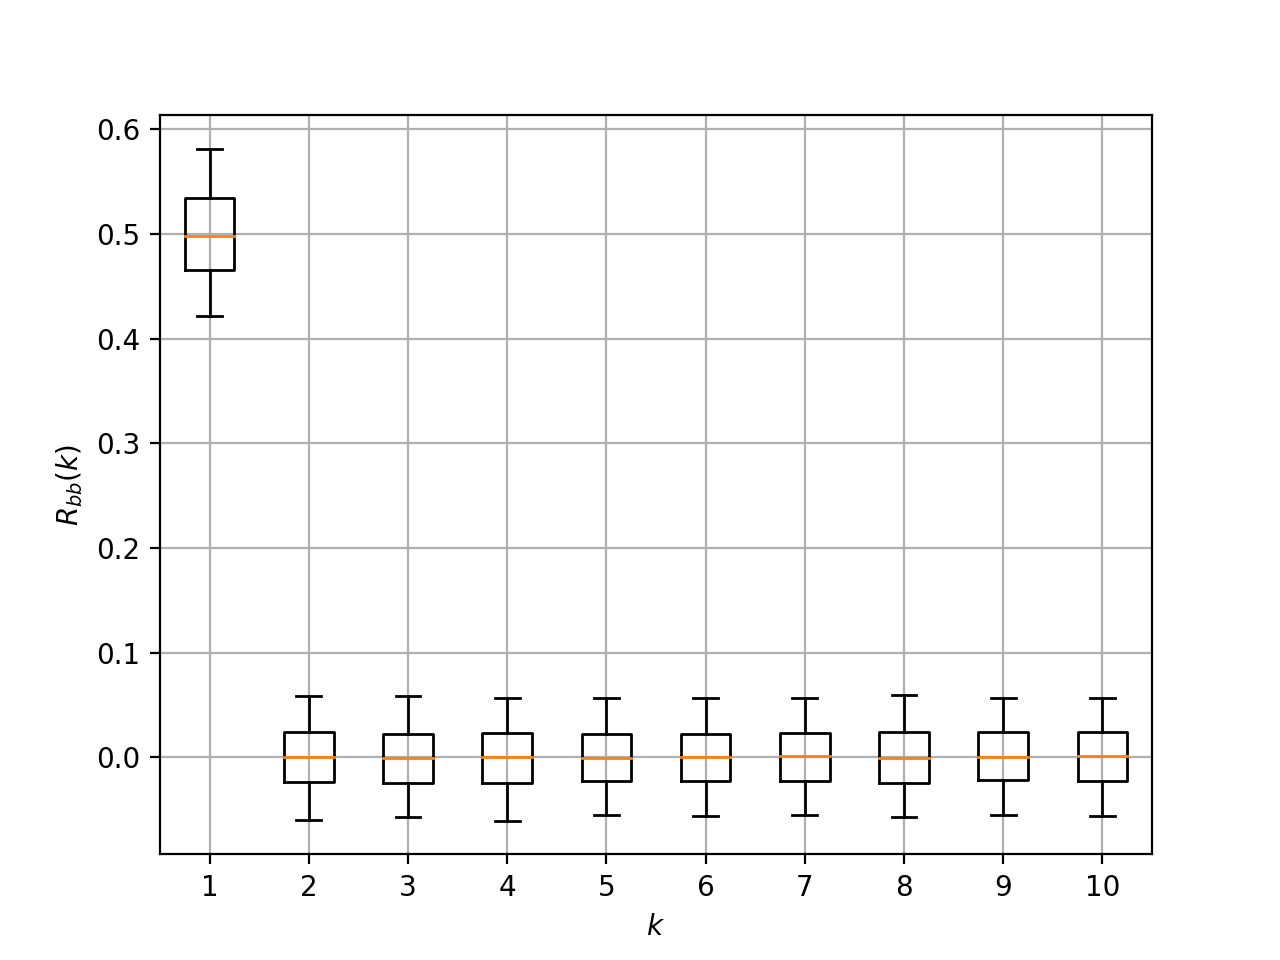

In [7]:
plt.figure(4)
plt.clf()

N=200
nb_tirages=3000   ## nombre d'expériences 
nb_lags = 10     ## on analyse les coefficients R_bb[0],...,R_bb[nb_lags-1]

data = np.zeros((nb_tirages,nb_lags))
for k in range(0,nb_tirages):
    b = 1/np.sqrt(2)*random.randn(N)
    Rb=calculerRxx(b)
    data[k,:]=Rb[0:nb_lags]
    

plt.clf()
plt.boxplot(data,showfliers=False,whis=(5,95)) 
plt.xlabel(r"$k$")
plt.ylabel(r"$R_{bb}(k)$")
plt.grid()
plt.show() 
    

**Question 6 :** représenter dans une même figure (utiliser la fonction $\texttt{subplot}$) les diagrammes à moustaches pour les valeurs de $N$ suivantes : $N_1=200$, $N_2=1000$ et $N_3=3000$. En tirer une conclusion empirique (cette dernière peut se montrer théoriquement). 


<IPython.core.display.Javascript object>


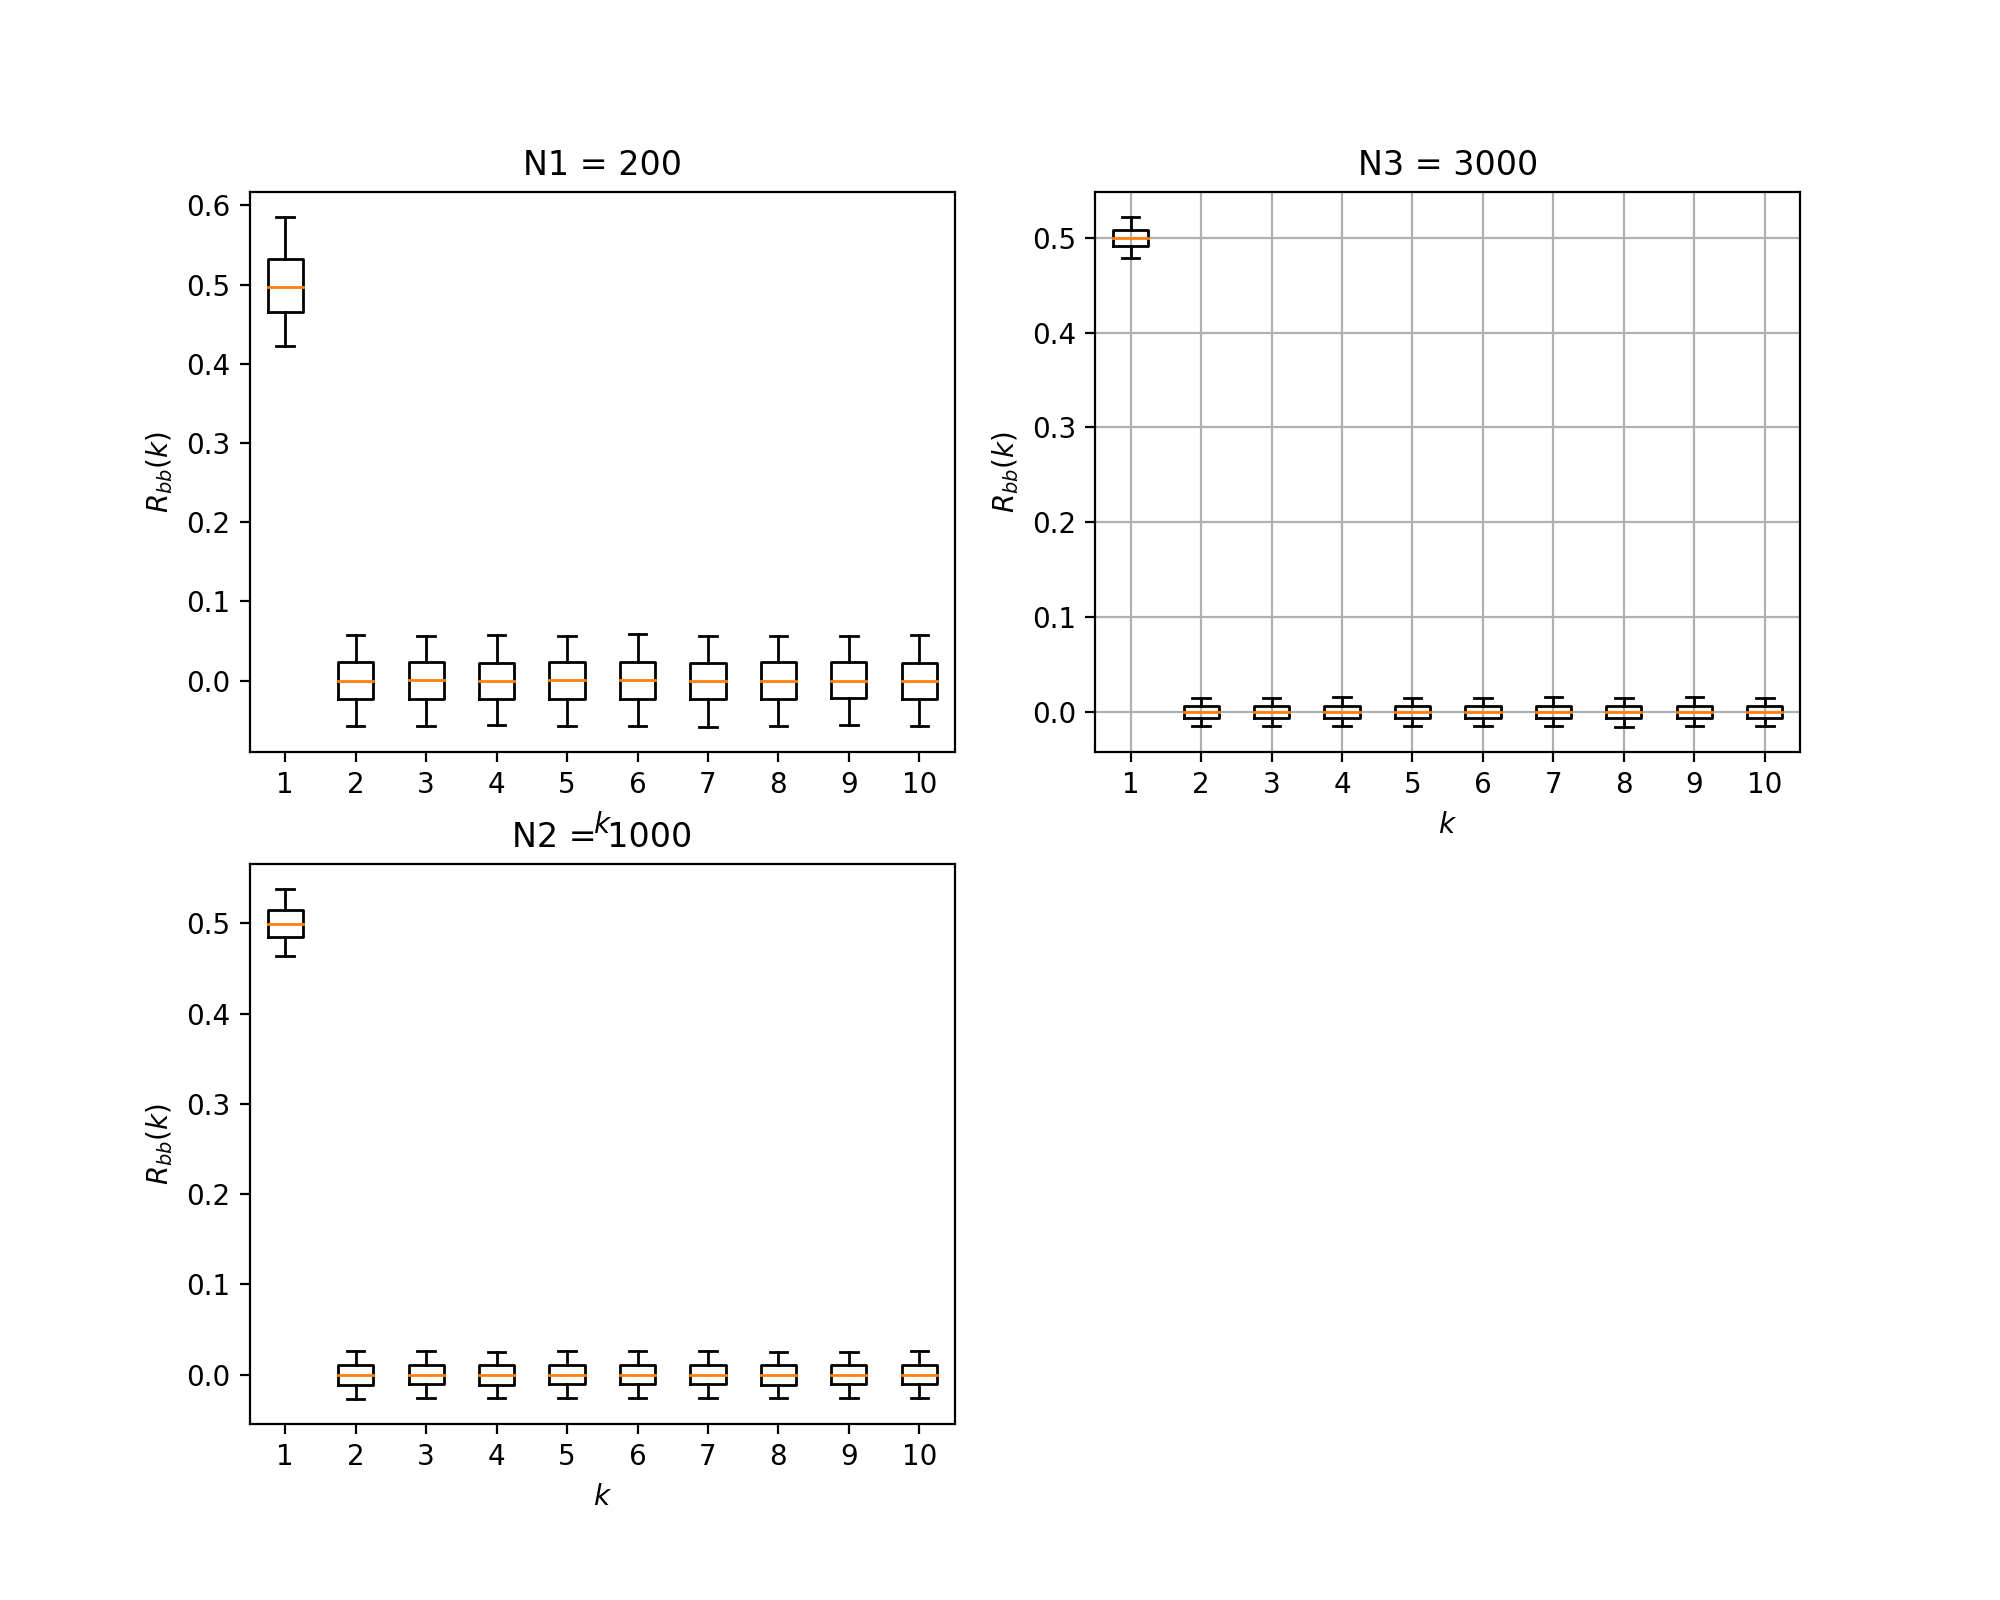

In [8]:


N1=200
N2=1000
N3=3000
nb_tirages=10000   ## nombre d'expériences 
nb_lags = 10     ## on analyse les coefficients R_bb[0],...,R_bb[nb_lags-1]

data1 = np.zeros((nb_tirages,nb_lags))
for k in range(0,nb_tirages):
    b = 1/np.sqrt(2)*random.randn(N1)
    Rb=calculerRxx(b)
    data1[k,:]=Rb[0:nb_lags]
    
data2 = np.zeros((nb_tirages,nb_lags))
for k in range(0,nb_tirages):
    b = 1/np.sqrt(2)*random.randn(N2)
    Rb=calculerRxx(b)
    data2[k,:]=Rb[0:nb_lags]
    
data3 = np.zeros((nb_tirages,nb_lags))
for k in range(0,nb_tirages):
    b = 1/np.sqrt(2)*random.randn(N3)
    Rb=calculerRxx(b)
    data3[k,:]=Rb[0:nb_lags]

    
 
    
    
    
plt.figure(5,figsize = (10, 8))
plt.clf()

plt.subplot(221)
plt.boxplot(data1,showfliers=False,whis=(5,95)) 
plt.xlabel(r"$k$")
plt.ylabel(r"$R_{bb}(k)$")
plt.title('N1 = 200')


plt.subplot(223)
plt.boxplot(data2,showfliers=False,whis=(5,95))
plt.xlabel(r"$k$")
plt.ylabel(r"$R_{bb}(k)$")
plt.title('N2 = 1000')

plt.subplot(222)
plt.boxplot(data3,showfliers=False,whis=(5,95)) 
plt.xlabel(r"$k$")
plt.ylabel(r"$R_{bb}(k)$")
plt.title('N3 = 3000')

plt.grid()
plt.show()

On remarque qu'au plus N augmente, au moins les valeurs sont dispersées.

**Question 7 :** représenter dans une même figure les diagrammes à moustaches de la fonction d'auto-corrélation du signal 
$$y[n]=\cos(2\pi n u_0) + \alpha .  b[n]$$ avec $N=200$ et pour les valeurs de $\alpha$  suivantes : $\alpha_{1,dB}=-10dB$dB et $\alpha_{2,dB}=-20$dB. 
On rappelle que $\alpha_{dB}=20\log_{10}(\alpha)$ soit aussi 
$$
\alpha=10^{\alpha_{dB}/20}.
$$
Discuter de la probabilité de mal estimer  $k_0$. Peut-être cette analyse peut aider à améliorer l'algorithme d'estimation du pitch. 

**Question 7bis ($\flat \flat$):** Prendre $\alpha=-10dB$ et effectuer l'estimation  de $k_0$ sur $1000$ tirages; déduire le nombre de fois où cette estimation est erronée. Recommencer ce qui précède pour toutes les valeurs 
$\texttt{alphaDB=np.arange(-20,0,1)}$ et dessiner la courbe
$$\alpha_{dB} \mapsto \text{probabilité de mauvaise estimation}$$

In [9]:
N=200
nb_tirages=1000 
alphadb1 = -10
alpha1 = 10**(alphadb1/20) #on retrouve alpha grâce à cette manipulation

alphadb2 = -20
alpha2 = 10**(alphadb2/20)

data1 = np.zeros((nb_tirages,nb_lags))
for k in range(0,nb_tirages):
    b = y1(k)
    Rb=calculerRxx(b)
    data[k,:]=Rb[0:nb_lags]
    
data2 = np.zeros((nb_tirages,nb_lags))
for k in range(0,nb_tirages):
    b = y2(k)
    Rb=calculerRxx(b)
    data[k,:]=Rb[0:nb_lags]

def y1(n):
    return np.cos(2*np.pi*n) + alpha1*(1/np.sqrt(2)*random.randn(N))

def y2(n):
    return np.cos(2*np.pi*n) + alpha2*(1/np.sqrt(2)*random.randn(N))

 
plt.figure(6)    
plt.clf() 
plt.plot(data1,y1(data1),color="red", linewidth=1,label="alpha1")
plt.plot(data2,y2(data2),color="blue", linewidth=1,label="alpha2")
plt.xlabel(r"$n$")
plt.ylabel(r"$y[k]$")
plt.grid()
plt.show() 




NameError: name 'y1' is not defined

## Essai sur un signal réel 

Considérons un enregistrement de la phrase (sémantiquement intéressante) : "un chapeau". 

**Question 8 :** visualiser le signal et isoler les parties du signal correpondant aux phonèmes : 
>- $\texttt{[un]}$ (signal que vous nommerez $x_1$), 
>- $\texttt{[ch]}$ (signal $x_2$), 
>- $\texttt{[a]}$ (signal $x_3$), 
>- $\texttt{[p]}$(signal $x_4$) et 
>- $\texttt{[o]}$ (signal $x_5$).



In [ ]:
Fe , data  = io.read("UnChapeau.wav")
x= data[:,0]+data[:,1]   ### Stereo  -> mono 
x=x/32000  ### sinon impossible de calculer la puissance, l'autocorrélation, etc. : signal trop fort
N=len(x)
a = np.sqrt(sum(x**2)/N)
x=x/a     ## pour avoir un signal de puissance égale à 1




**Question 9 :** dans cinq sous-fenêtres, dessiner les graphes des fonctions d'auto-corrélation des $5$ sous-signaux précédents. On utilisera la fonction $\texttt{EstimPitch2}$ avec $K_{\max}=400$ ce qui revient à dire que le pitch est recherché parmi les fréquences supérieures à $\frac{44100}{450}=98$Hz (raisonnable pour une voix d'homme). 

**Question 10 :** pour les 3 voyelles, estimer graphiquement le pitch en Hz. Reprendre l'estimation automatiquement en utilisant l'estimateur développé précédemment. Vérifier la concordance des deux estimateurs. 

**Question 11 :** afin de valider les valeurs trouvées à la question précédente, représenter dans 
 trois sous-fenêtres superposées le périodogramme (voir TP précédent) de ces trois signaux (l'axe des abcisses sera gradué en Hz). Grâce à ces graphes, estimer le pitch des trois voyelles graphiquement. Retrouve-t-on les valeurs de la question précédente? 
 
**Question 12:** justifier empiriquement que la puissance permet de discriminer les voyelles d'une part des consonnes d'autre part. 

## Algorithme général 

On propose l'algorithme suivant pour un signal de parole noté $x$. 

>- Définir la durée d'un petit bloc : $D=22.5$ms correspondant à un nombre $N_b$ d'échantillons. Le premier sous-bloc est noté $x^{(1)}$, le deuxième $x^{(2)}$, etc. 
>- Définir un seuil de puissance noté $s<1$
>- Pour chaque sous-bloc $x^{(i)}$, calculer la puissance $P^{(i)}$.
>- Calculer $P=\max_i P^{(i)}$.
>- Pour chaque bloc $x^{(i)}$ : 
     * Si la puissance du bloc est grande à proportion de  $P^{(i)}> sP$, alors estimer le pitch $f^{(i)}$ par l'algorithme de la fonction de corrélation.
     * Sinon décider que le bloc est issu d'une consonne et décider $f^{(i)}=0$. 
    
Une difficulté est de choisir le seuil $s$. D'après l'analyse faite sur les segments de la phrase, on pourrait choisir par exemple $s=0.1$. 

**Question 13 :** tester l'algorithme ci-dessus sur le signal "un chapeau". Représenter dans trois  sous-fenêtres superposées 
* le signal $x$,
* la suite des $P^{(i)}$ et 
* la suite des $f^{(i)}$. 
Bien veiller à ce que l'axe des abcisses soit le même pour les trois graphiques, avec une échelle en secondes. 

Le cas échéant, modifier le seuil $s$. 


## Le grand saut

**Question 14 :** enregistrer une phrase de deux ou trois mots et tester l'algorithme du pitch sur cette phrase. Représenter les trois graphes comme à la question précédente. 

**Question 15 :** afin de valider le résultat obtenu, isoler une voyelle de la phrase, estimer le pitch grâce au périodogramme et comparer avec le pitch obtenu à la question précédente autour de la-dite voyelle. 